# Aufgabe 3: Cross Validation and Grid Search 

We use sklearn's GridSearchCV and cross validation to search for an optimal number of kneighbors for the KNeighborsClassifier to maximize the precision of the classification of the iris data from task 1.

In [1]:
# imports
import pandas
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


First we load the iris data from task 1 and split it into training and validation set.

In [2]:
# load dataset from task 1
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [3]:
# split-out dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]

Then we specify our parameter space and performance metric.

In [4]:
# specify parameter space and performance metric
max_n = 30
k = range(1, max_n + 1)
parameter_grid = {"n_neighbors": k}
scoring = "accuracy"
cross_val = 10

Next we run a performance test on GridSearchCV. Therefor we search mulitple times to maximize the precision save the best time for later comparison. Each time we use a different number of jobs.

In [5]:
# parameter for performance test
max_jobs = 4
best_in = 3

In [6]:
# performance test
measurements = []
i = 1
while i <= max_jobs:
    min_t = float("inf")  
    for j in range(best_in):
        kneighbors = KNeighborsClassifier()
        grid_search = GridSearchCV(kneighbors, parameter_grid, cv=cross_val, scoring=scoring, n_jobs=i)
        start = timer()
        grid_search.fit(X, y)    
        stop = timer()
        min_t = min(min_t, stop - start)
    measurements.append(min_t)
    i += 1

Finally we plot our results:

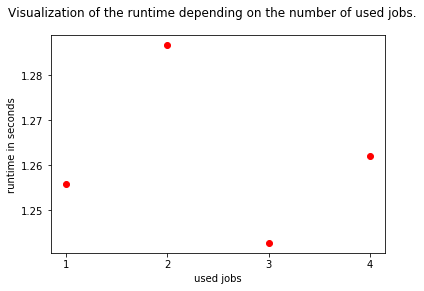

In [7]:
fig = plt.figure()
fig.suptitle('Visualization of the runtime depending on the number of used jobs.')
plt.xticks(range(1, max_jobs + 1))
ax = fig.add_subplot(111)
ax.set_xlabel('used jobs')
ax.set_ylabel('runtime in seconds')
ax.plot(range(1, max_jobs + 1), measurements, 'ro')
plt.show()

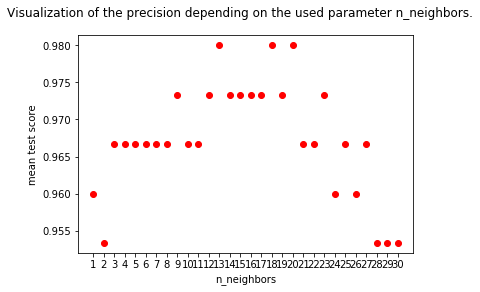

In [8]:
fig = plt.figure()
fig.suptitle('Visualization of the precision depending on the used parameter n_neighbors.')
plt.xticks(range(1,max_n + 1))
ax = fig.add_subplot(111)
ax.set_xlabel('n_neighbors')
ax.set_ylabel('mean test score')
ax.plot(grid_search.cv_results_['param_n_neighbors'].data,
        grid_search.cv_results_['mean_test_score'], 'ro')
plt.show()